42572 - Swanand Wirkar

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

%matplotlib inline

In [31]:
data = pd.read_csv('USA_Housing.csv')

In [32]:
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [34]:
data.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [35]:
scaler = StandardScaler()

X=data.drop(['Price','Address'],axis=1)
y=data['Price']

cols = X.columns

X = scaler.fit_transform(X)

In [36]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


In [37]:
lr = LinearRegression()
lr.fit(X_train,y_train)

pred = lr.predict(X_test)

r2_score(y_test,pred)

0.9185060945363621

In [38]:
y_pred = model.predict(X_test)

<AxesSubplot:xlabel='Price'>

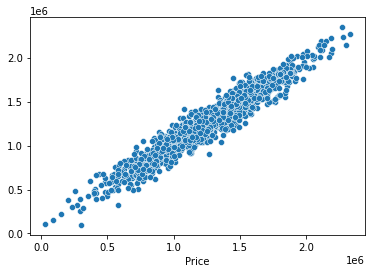

In [39]:
sns.scatterplot(x=y_test, y=pred)

<AxesSubplot:xlabel='Price', ylabel='Count'>

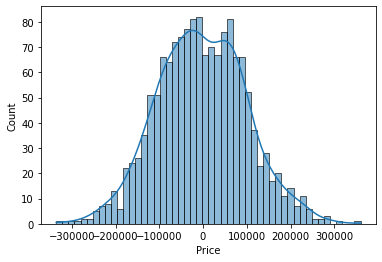

In [40]:
sns.histplot((y_test-pred),bins=50,kde=True)

In [41]:
cdf=pd.DataFrame(lr.coef_, cols, ['coefficients']).sort_values('coefficients',ascending=False)
cdf

,coefficients
Avg. Area Income,230377.522562
Avg. Area House Age,163793.118566
Area Population,151104.850817
Avg. Area Number of Rooms,122101.350269
Avg. Area Number of Bedrooms,1627.317237
